In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
import os
import pandas as pd

run_paths = [
   #"../mlruns/117967985259146291/0320dd8c949d4fed92b098c9bc2ea4b4/metrics/", # SMALL SYN
    #"../mlruns/117967985259146291/fe82d5ea6ef14bfcaa382bac08eca665/metrics/", # MEDIUM SYN
    #"../mlruns/117967985259146291/8d735c8048dc4233b52a53f90d4de39c/metrics/", # LARGE SYN
    
    #"../mlruns/117967985259146291/6111072cb4fc420099d4cbbfff0e0a28/metrics/", # SMALL SYNFLEUR 1.0h
    #"../mlruns/117967985259146291/f21f880299db4b3987ddf60a70f965cd/metrics/", # MEDIUM SYNFLEUR 1.0h
    #"../mlruns/117967985259146291/eaad4c60cd734ecd84e43b94f4250fd9/metrics/", # LARGE SYNFLEUR
    
    
    #"../mlruns/117967985259146291/1d6aa256120f478aa454490c7bc9e1d4/metrics/", # SMALL SYNCV
    #"../mlruns/117967985259146291/b5fbbe1ad2f64e8d866592754a2f181b/metrics/", # MEDIUM SYNCV    
    "../mlruns/117967985259146291/957f69d28f5c4835b4084932b946c948/metrics/", # LARGE SYNCV 

]

df_list = []  # List to store DataFrames from each run

for run_path in run_paths:
    frames = []
    for file_name, col_name in [("loss", "loss"), ("eval_loss", "eval_loss")]:
        file_path = os.path.join(run_path, file_name)
        if os.path.exists(file_path):
            epochs, losses = [], []
            with open(file_path, "r") as file:
                for line in file:
                    parts = line.strip().split()
                    if len(parts) == 3:
                        _, loss, epoch = parts
                        epochs.append(int(epoch))
                        losses.append(float(loss))
            # Create a DataFrame for each file
            df_temp = pd.DataFrame({"epoch": epochs, col_name: losses})
            frames.append(df_temp)
        else:
            print(f"File {file_name} not found in {run_path}")
    
    # Merge DataFrames on 'epoch'
    if frames:
        df_run = frames[0]
        for frame in frames[1:]:
            df_run = pd.merge(df_run, frame, on="epoch", how="outer")
        df_run["run"] = os.path.basename(os.path.dirname(run_path))
        df_list.append(df_run)

df = pd.concat(df_list, ignore_index=True)
df = df.sort_values(by="epoch").reset_index(drop=True)
print(df)

    epoch    loss  eval_loss      run
0    1000  0.2628   0.149265  metrics
1    2000  0.1638   0.127693  metrics
2    3000  0.1456   0.118304  metrics
3    4000  0.1320   0.108415  metrics
4    5000  0.1297   0.106341  metrics
5    6000  0.1175   0.100669  metrics
6    7000  0.0893   0.098524  metrics
7    8000  0.0719   0.099205  metrics
8    9000  0.0754   0.098555  metrics
9   10000  0.0687   0.097574  metrics
10  11000  0.0734   0.096698  metrics
11  12000  0.0767   0.095607  metrics
12  13000  0.0607   0.094388  metrics
13  14000  0.0482   0.095430  metrics
14  15000  0.0424   0.095651  metrics
15  16000  0.0467   0.095598  metrics
16  17000  0.0419   0.095008  metrics
17  18000  0.0393   0.094999  metrics
18  19000  0.0422   0.094880  metrics


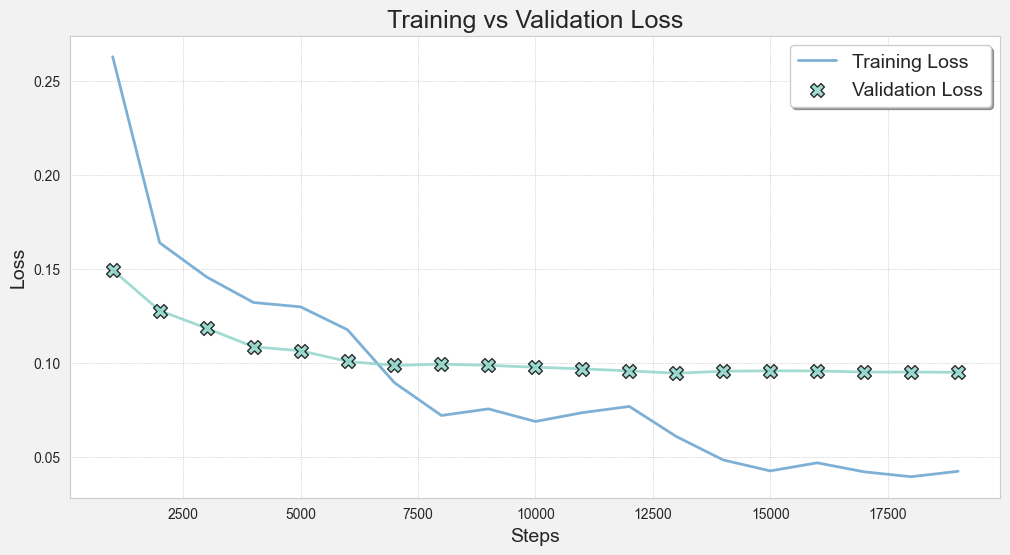

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

 # Setting a
 # dvalue for demonstration

#df['eval_loss'][0] = 0.72
# Set style and figure
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")
plt.rcParams["font.size"] = 10

# Plot training loss as a line
plt.plot(df["epoch"], df["loss"], label="Training Loss", 
         color="#7eb0d5", linewidth=2, alpha=1.0)

# Filter and sort eval_loss data
eval_df = df.dropna(subset=["eval_loss"]).sort_values(by="epoch")

# Plot eval_loss as scatter
plt.scatter(eval_df["epoch"], eval_df["eval_loss"], label="Validation Loss", 
            color="#8bd3c7", s=100, zorder=5, marker="X", alpha=0.8, edgecolor="black")

# Connect scatter points with a line
plt.plot(eval_df["epoch"], eval_df["eval_loss"], color="#8bd3c7", linestyle='-', linewidth=2, alpha=0.8)

plt.xlabel("Steps", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Training vs Validation Loss", fontsize=18)
plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)
plt.legend(fontsize=14, loc="upper right", frameon=True, shadow=True, facecolor="white")

plt.show()

